Diabetes dataset

Description: Health data to predict whether patients have diabetes based on indicators such as blood pressure, age and glucose level. The Result column is a target: 1 is for diabetes positive, 0 for negative.

Analysis Suggestions:
Data exploration: Analysis of distributions and correlations between variables.

Classification:
Use Logistic Regression and Random Forest for absorption. Test SVM and KNN for comparison.

Evaluation: Use metrics such as Accuracy, Recall and F1-score.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score

In [32]:
# Importing dataset and taking a first look at it
dataset = pd.read_csv(r'diabetes.csv')

dataset.info()

print('')
print('Checking for any missing values in the dataset:')
print(dataset.isna().sum())
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Checking for any missing values in the dataset:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPed

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


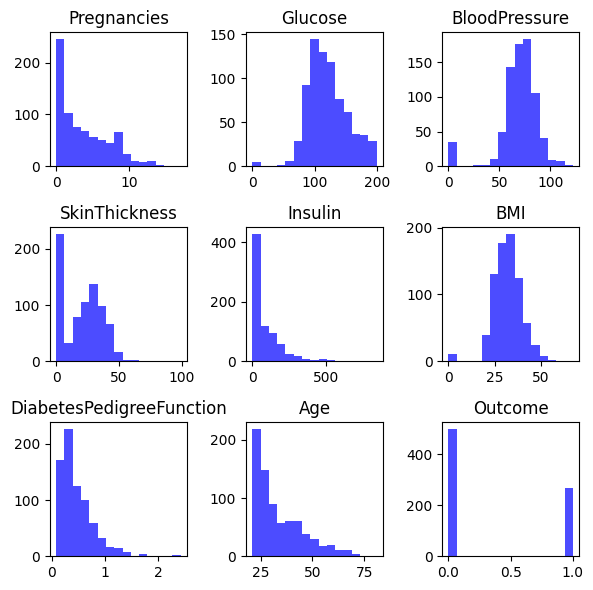

In [33]:
# Let's take a look at the distribution of each variable
fig, axes = plt.subplots(3, 3, figsize = (6,6))
axes = axes.ravel()

for i, column in enumerate(dataset.columns):
  axes[i].hist(dataset[column], bins = 15, color = 'blue', alpha = 0.7)
  axes[i].set_title(column)

plt.tight_layout()
plt.show()

Dataset Normalization: very useful when data has different scales (can also be calculated with StandarScaler)

In [34]:
# Separating the data that we are going to normalize from the target.
# We can't normalize target, because LR and RF models doesn't accept continuos values in the target column
data_to_normalize = dataset.drop(['Outcome'], axis=1)
data_target = dataset['Outcome']

# Defining Mean and Standard Deviation to apply Normalization
data_mean = data_to_normalize.mean()
data_std = data_to_normalize.std()

In [35]:
# Z score normalization
data_normalized = (data_to_normalize - data_mean) / data_std

# Concatenating normalized data with the target column
data_normalized = pd.concat([data_normalized, data_target], axis=1)
data_normalized.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067,1
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548,0
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515,1
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871,0
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483,1


Text(0.5, 1.0, 'Covariance Matrix')

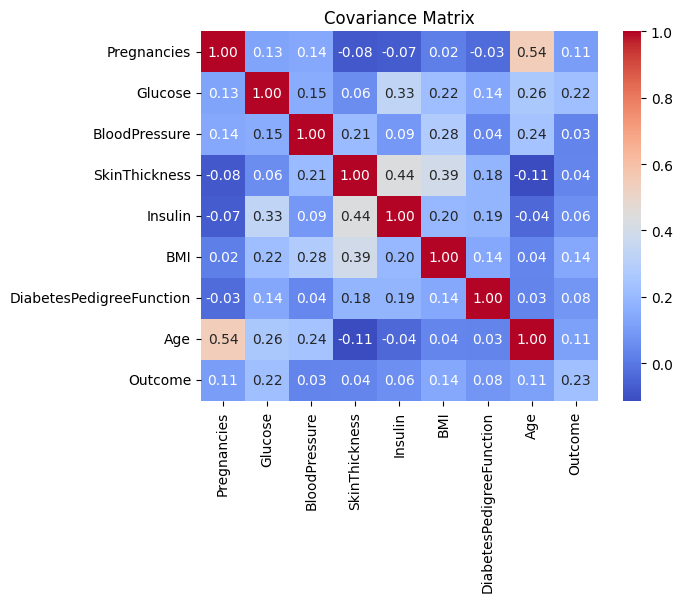

In [36]:
# Lets take a look at a Covariance Matrix, that shows us the linear dependency between two variables
cov_matrix = data_normalized.cov()

# Heatmap of covariance matrix
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='coolwarm').set_title('Covariance Matrix')

Creating an instance of the predicting model. We will do a comparission of two models: LogisticRegression, RandomForest. It will be compared using the Accuracy Score, Recall and F1-Score

In [37]:
# Removing columns that will not be used for model training, those will be stored as X and y, y beeing the target values
X = data_normalized.drop(['Outcome'], axis=1).values
y = data_normalized['Outcome'].values

# Spliting dataset into traning and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [38]:
# Creating an instance of Logistic Regression and Random Forest
logistic = LogisticRegression()
forest = RandomForestClassifier()

# Fitting models
logistic.fit(X_train, y_train)
forest.fit(X_train, y_train)

# Making predictions
log_prediction = logistic.predict(X_test)
for_prediction = forest.predict(X_test)

In [39]:
# Checking models predictions with accuracy test
log_accuracy = accuracy_score(y_test, log_prediction)
for_accuracy = accuracy_score(y_test, for_prediction)

print(f'Logistic Regression accuracy: {np.round(log_accuracy * 100, 2)}%')
print(f'Random Forest accuracy: {np.round(for_accuracy * 100, 2)}%')

Logistic Regression accuracy: 77.06%
Random Forest accuracy: 75.76%


Checking models predictions with Recall and F1-Score

In [40]:
# Recall
log_recall = recall_score(y_test, log_prediction)
for_recall = recall_score(y_test, for_prediction)

print(f'Logistic Regression recall: {np.round(log_recall * 100, 2)}%')
print(f'Random Forest recall: {np.round(for_recall * 100, 2)}%')

Logistic Regression recall: 52.5%
Random Forest recall: 53.75%


In [41]:
#F1-Score
log_f1 = f1_score(y_test, log_prediction)
for_f1 = f1_score(y_test, for_prediction)

print(f'Logistic Regression F1-score: {np.round(log_f1 * 100, 2)}%')
print(f'Random Forest F1-score: {np.round(for_f1 * 100, 2)}%')

Logistic Regression F1-score: 61.31%
Random Forest F1-score: 60.56%
